Group- 82, Laxmi Sharma, Abhishek Sharma, Abhishek Sharma and Water Potability Prediction- [Weightage 10%]

**Import Libraries/Dataset**

In [ ]:
#import data set
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability (2).csv


**Data Visualization and Exploration**

In [ ]:
# Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them
import io
df = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))
df.head(2)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0

In [ ]:
# target is Potability , lets check the distribusion on the column
df.value_counts('Potability')

Potability
0    1998
1    1278
dtype: int64

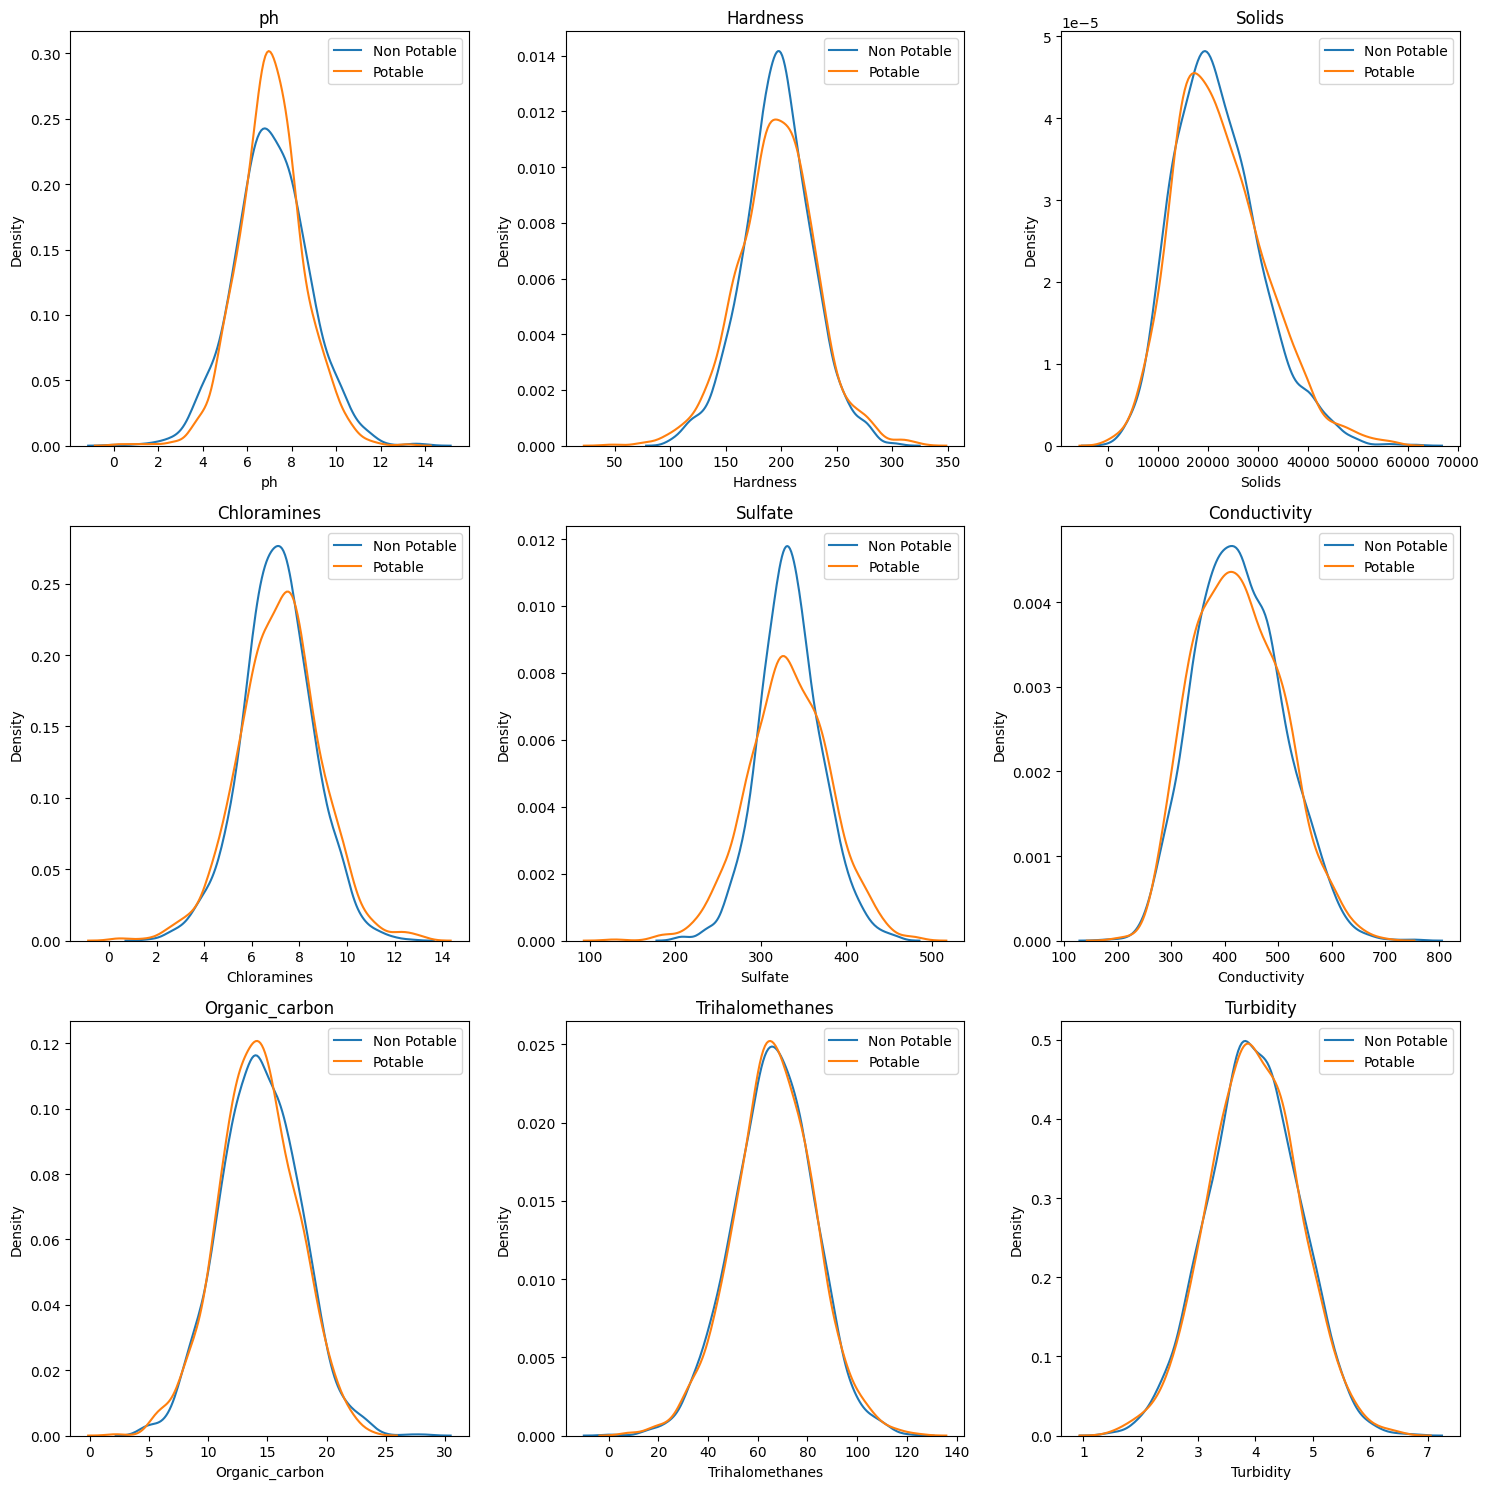

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

we can see the distribution of all independent variable with target variable, almost all features followa normal distribusion wrt potable and non-portablity.Basically Bi-variate analysis.

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

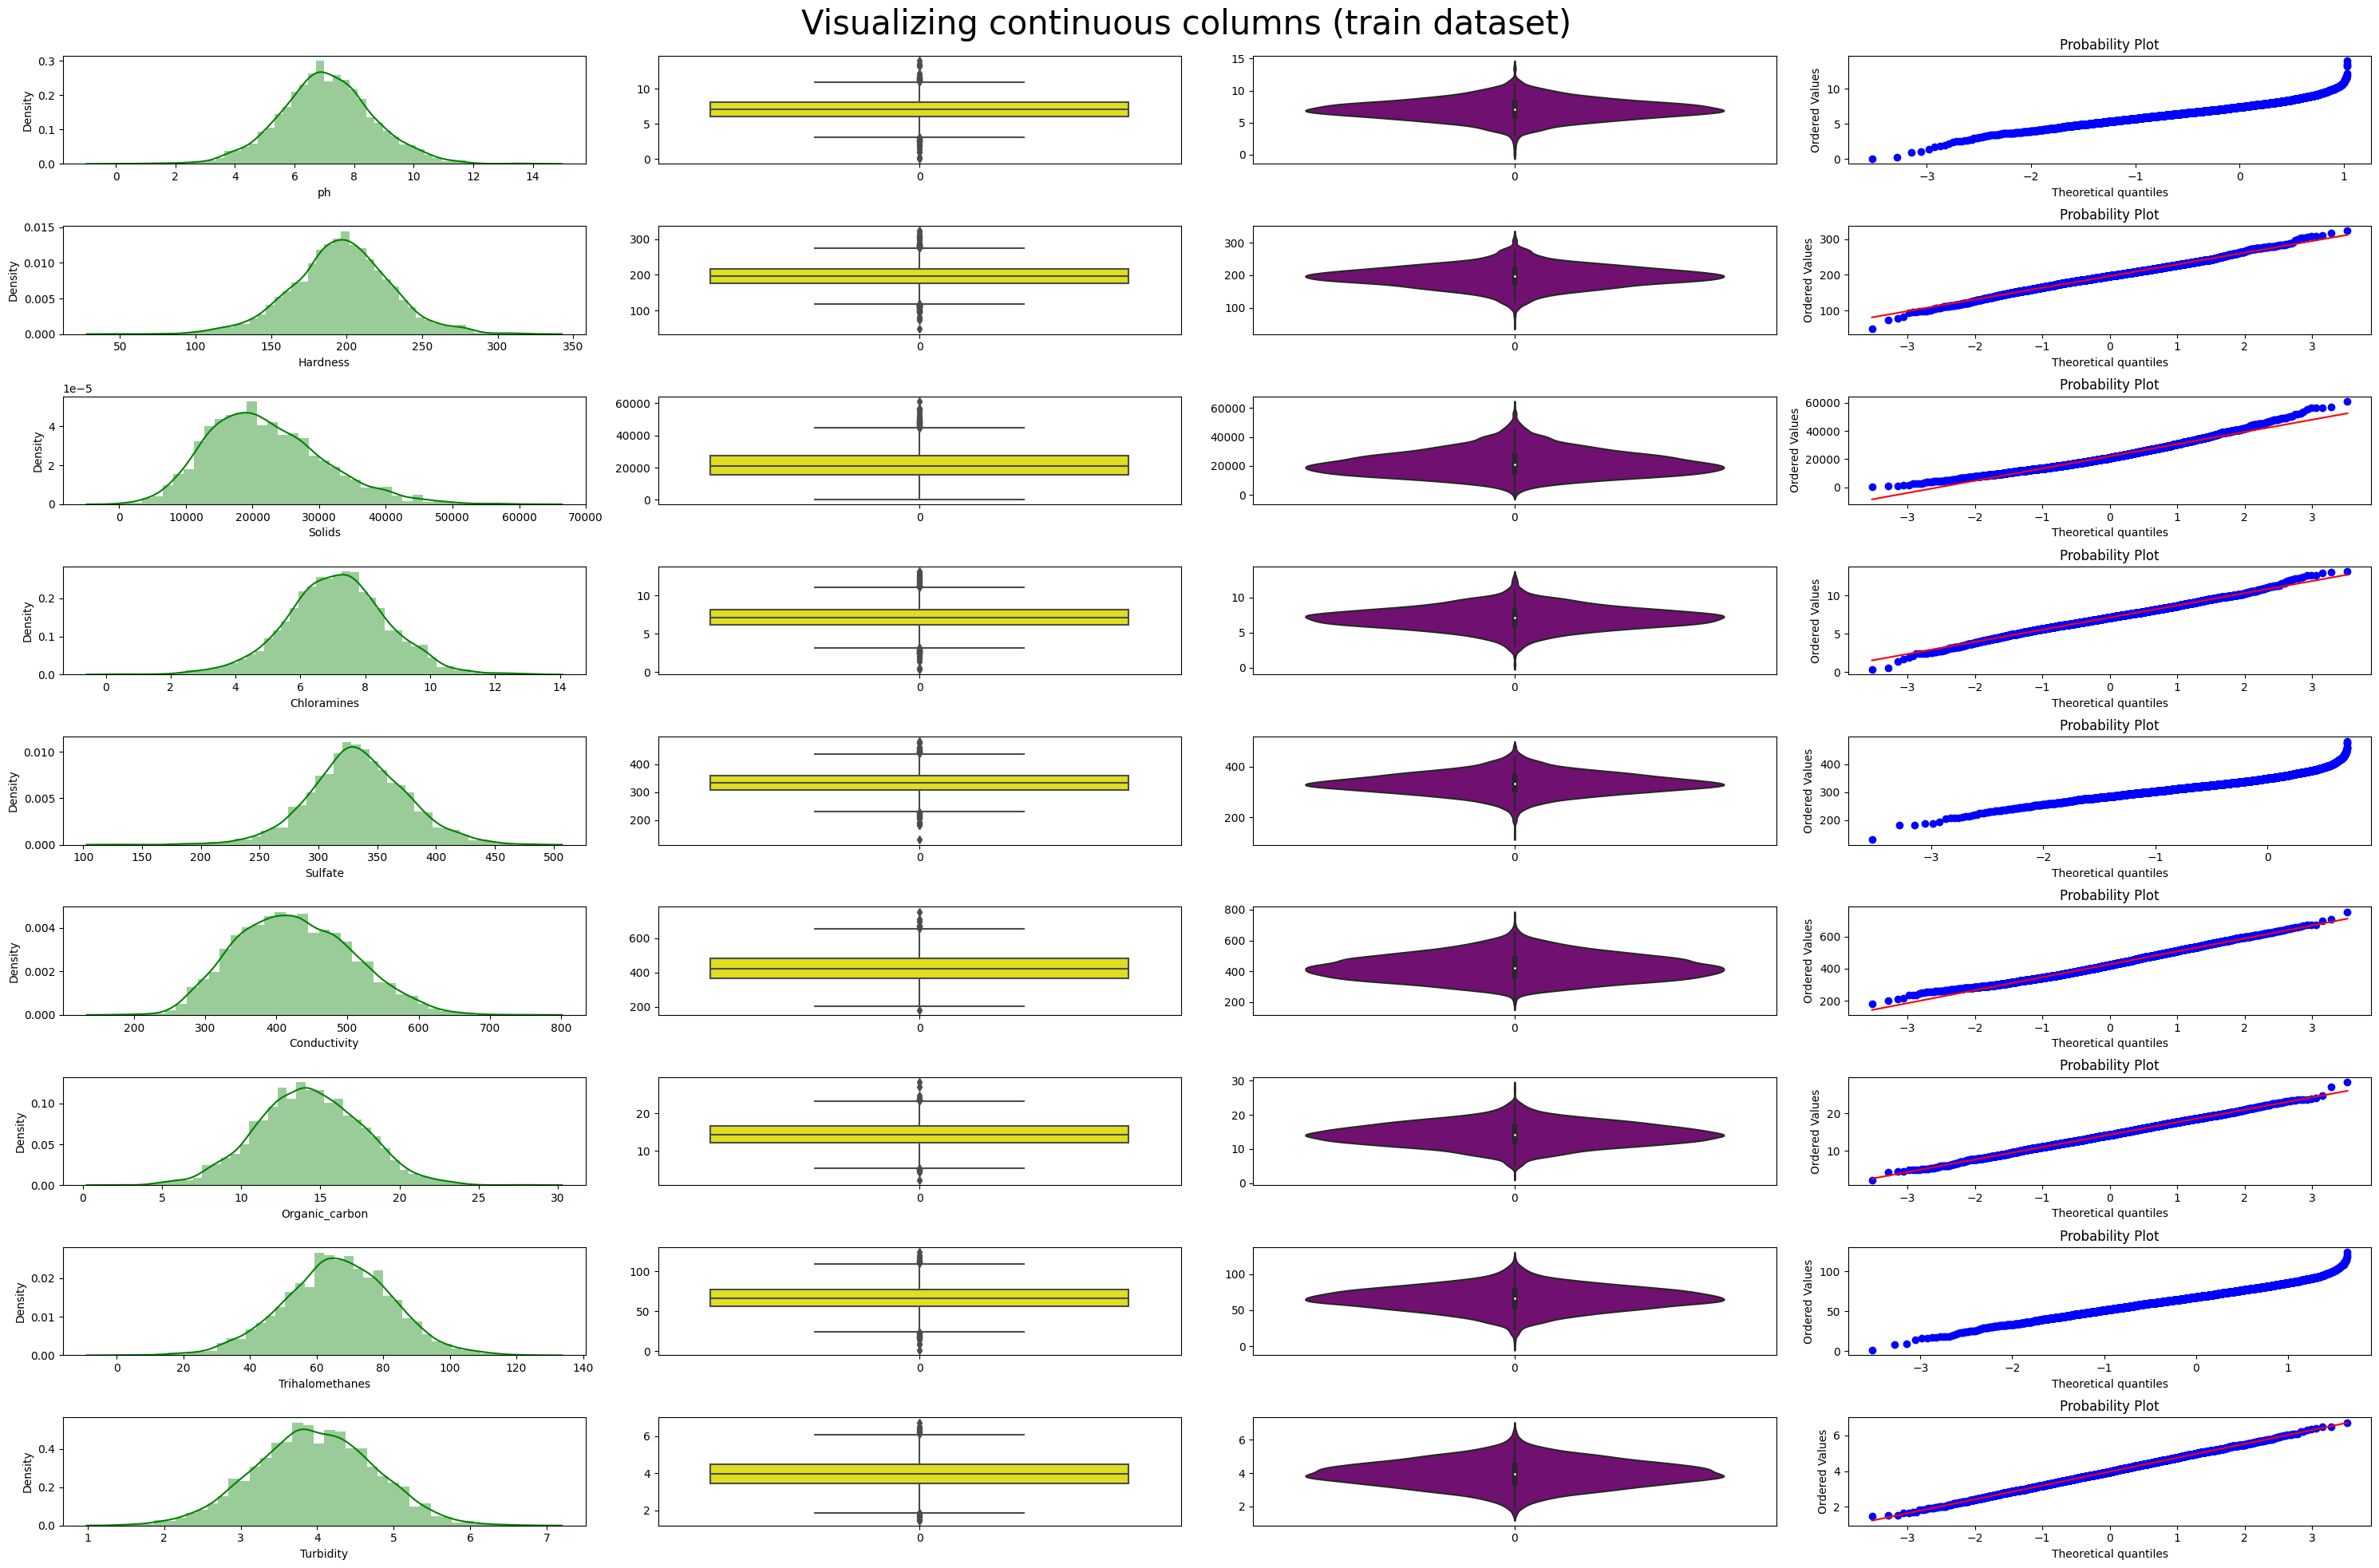

In [ ]:
import warnings
numeric_features=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
from scipy import stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

In [ ]:
#data summary
df.describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Turbidity,	Potability,Chloramines,--> these featues are very clustered aronund the mean

 Mean and meadian varies for solids and Conductivity, those two columns are skewed

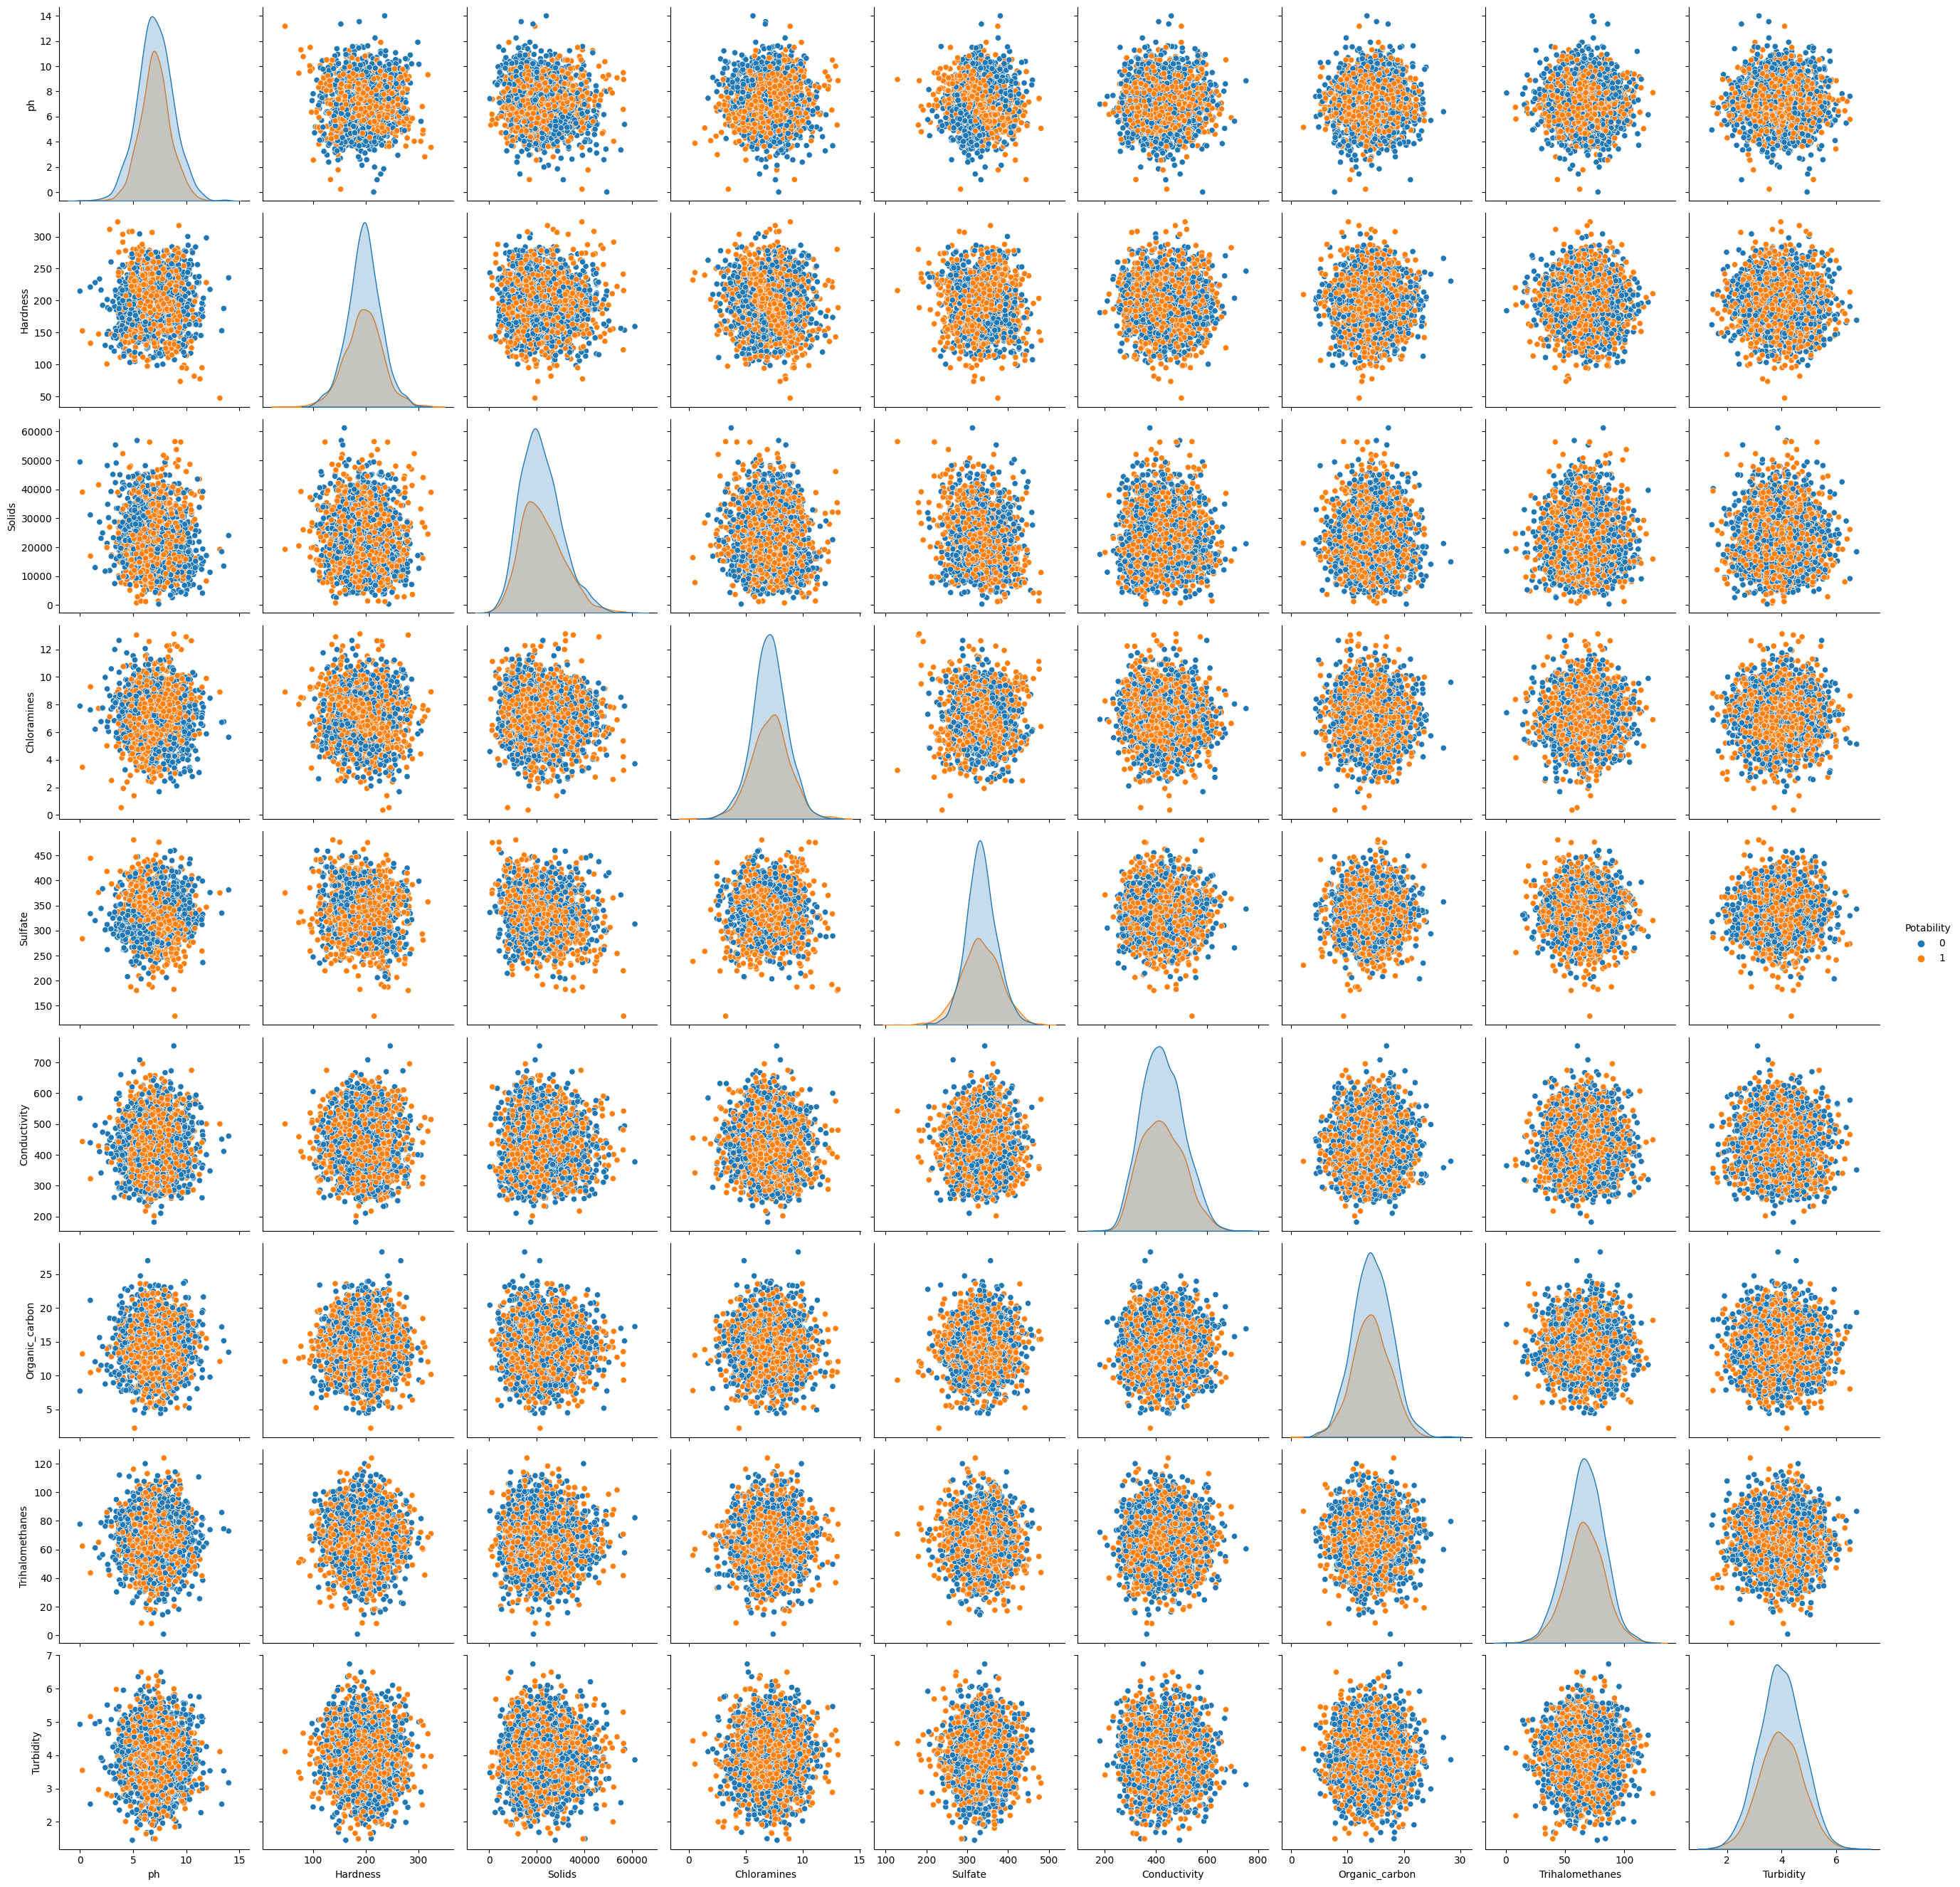

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="Potability", size=3)

In [ ]:
#correlation analysis
df.corr().style.background_gradient(cmap = "Blues")
#None if the colums are highly correlated

<Axes: >

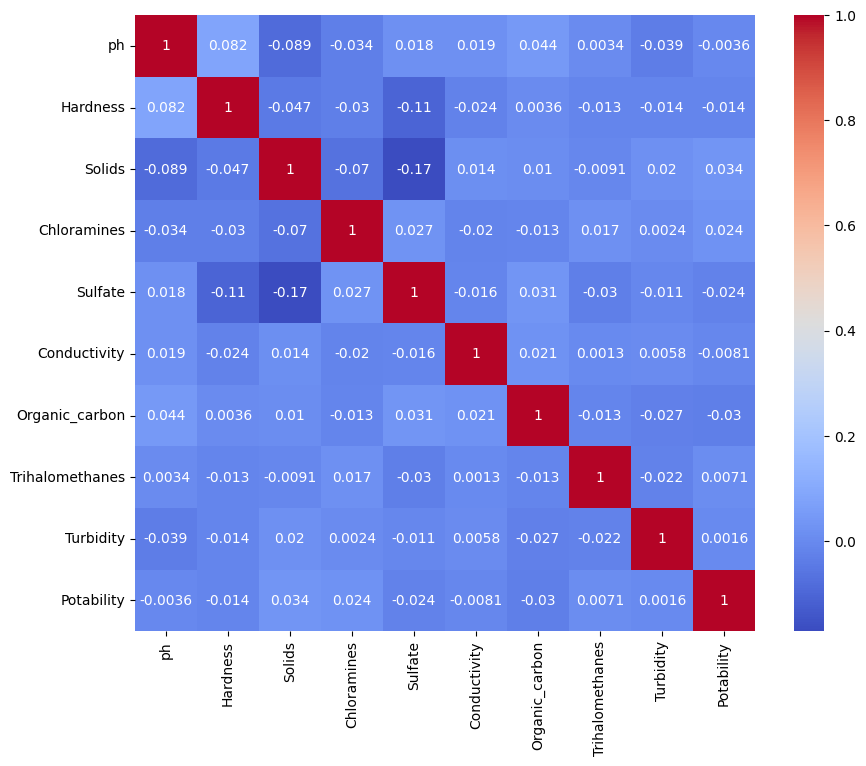

In [ ]:
#visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

After analyzing these graphs, the following hypotheses can be made:

1-Most features are distributed according to the normal distribution law.


2-There are minor outliers for some features.

In [ ]:
#lets look at the target feature
print('No Potable', round(df['Potability'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Potable', round(df['Potability'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Potable 60.99 % of the dataset
Potable 39.01 % of the dataset


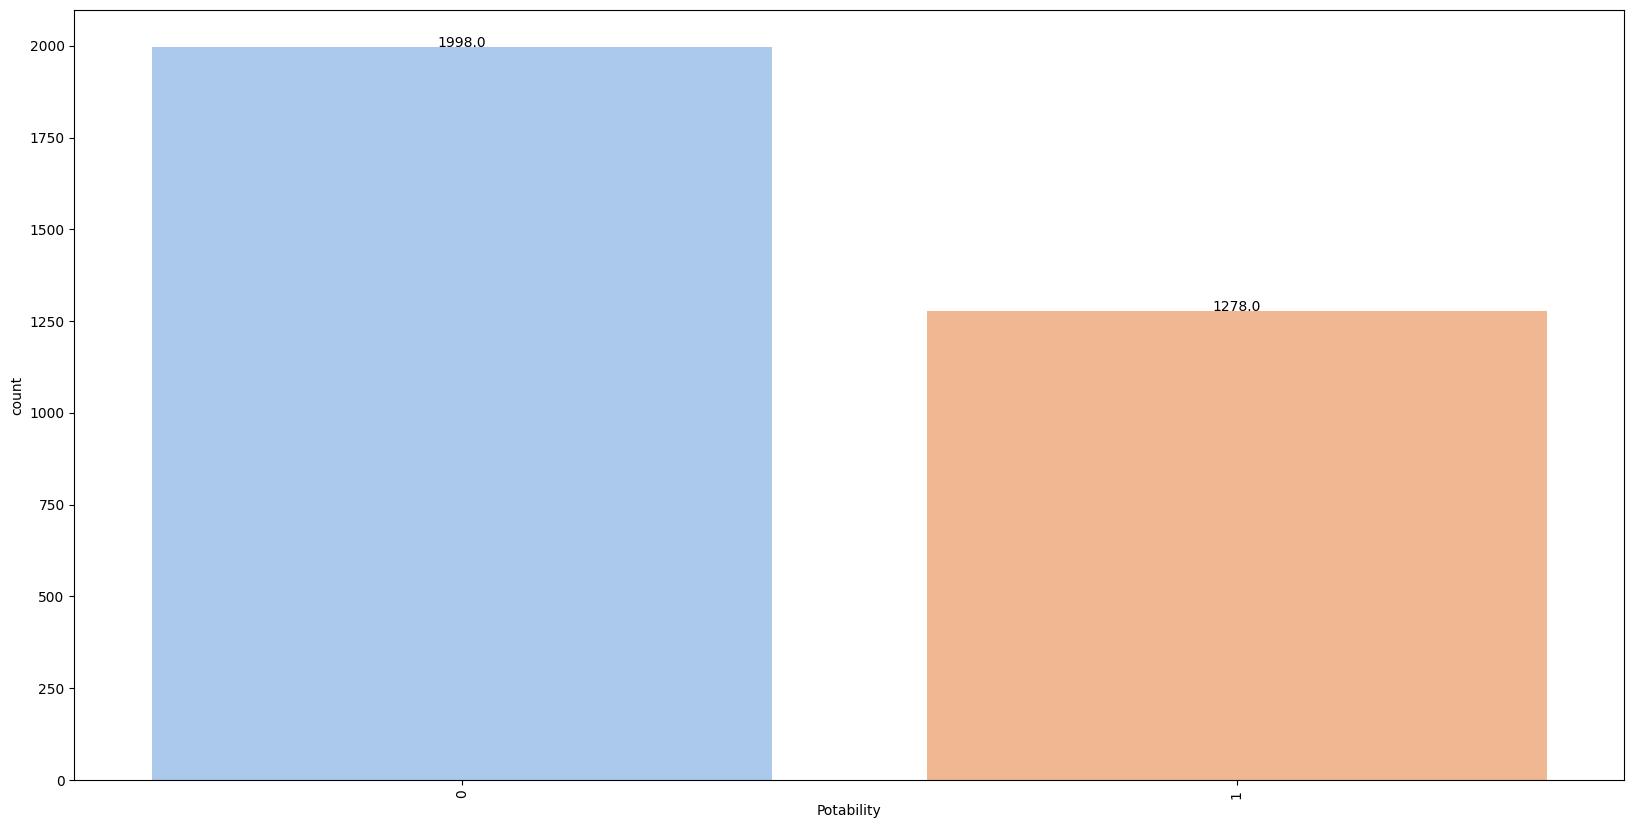

In [ ]:

fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'Potability' , data = df,palette='pastel')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

There is a noticeable imbalance between classes in the dataset, with one class being significantly more prevalent than the other(s).No need to do any sampling .


In [ ]:
# lets see the unique counts of all columns and the nulls present
list(zip(df.columns,df.dtypes,df.isnull().sum(),df.nunique()))

[('ph', dtype('float64'), 491, 2785),
 ('Hardness', dtype('float64'), 0, 3276),
 ('Solids', dtype('float64'), 0, 3276),
 ('Chloramines', dtype('float64'), 0, 3276),
 ('Sulfate', dtype('float64'), 781, 2495),
 ('Conductivity', dtype('float64'), 0, 3276),
 ('Organic_carbon', dtype('float64'), 0, 3276),
 ('Trihalomethanes', dtype('float64'), 162, 3114),
 ('Turbidity', dtype('float64'), 0, 3276),
 ('Potability', dtype('int64'), 0, 2)]

**Data Pre-processing and cleaning**

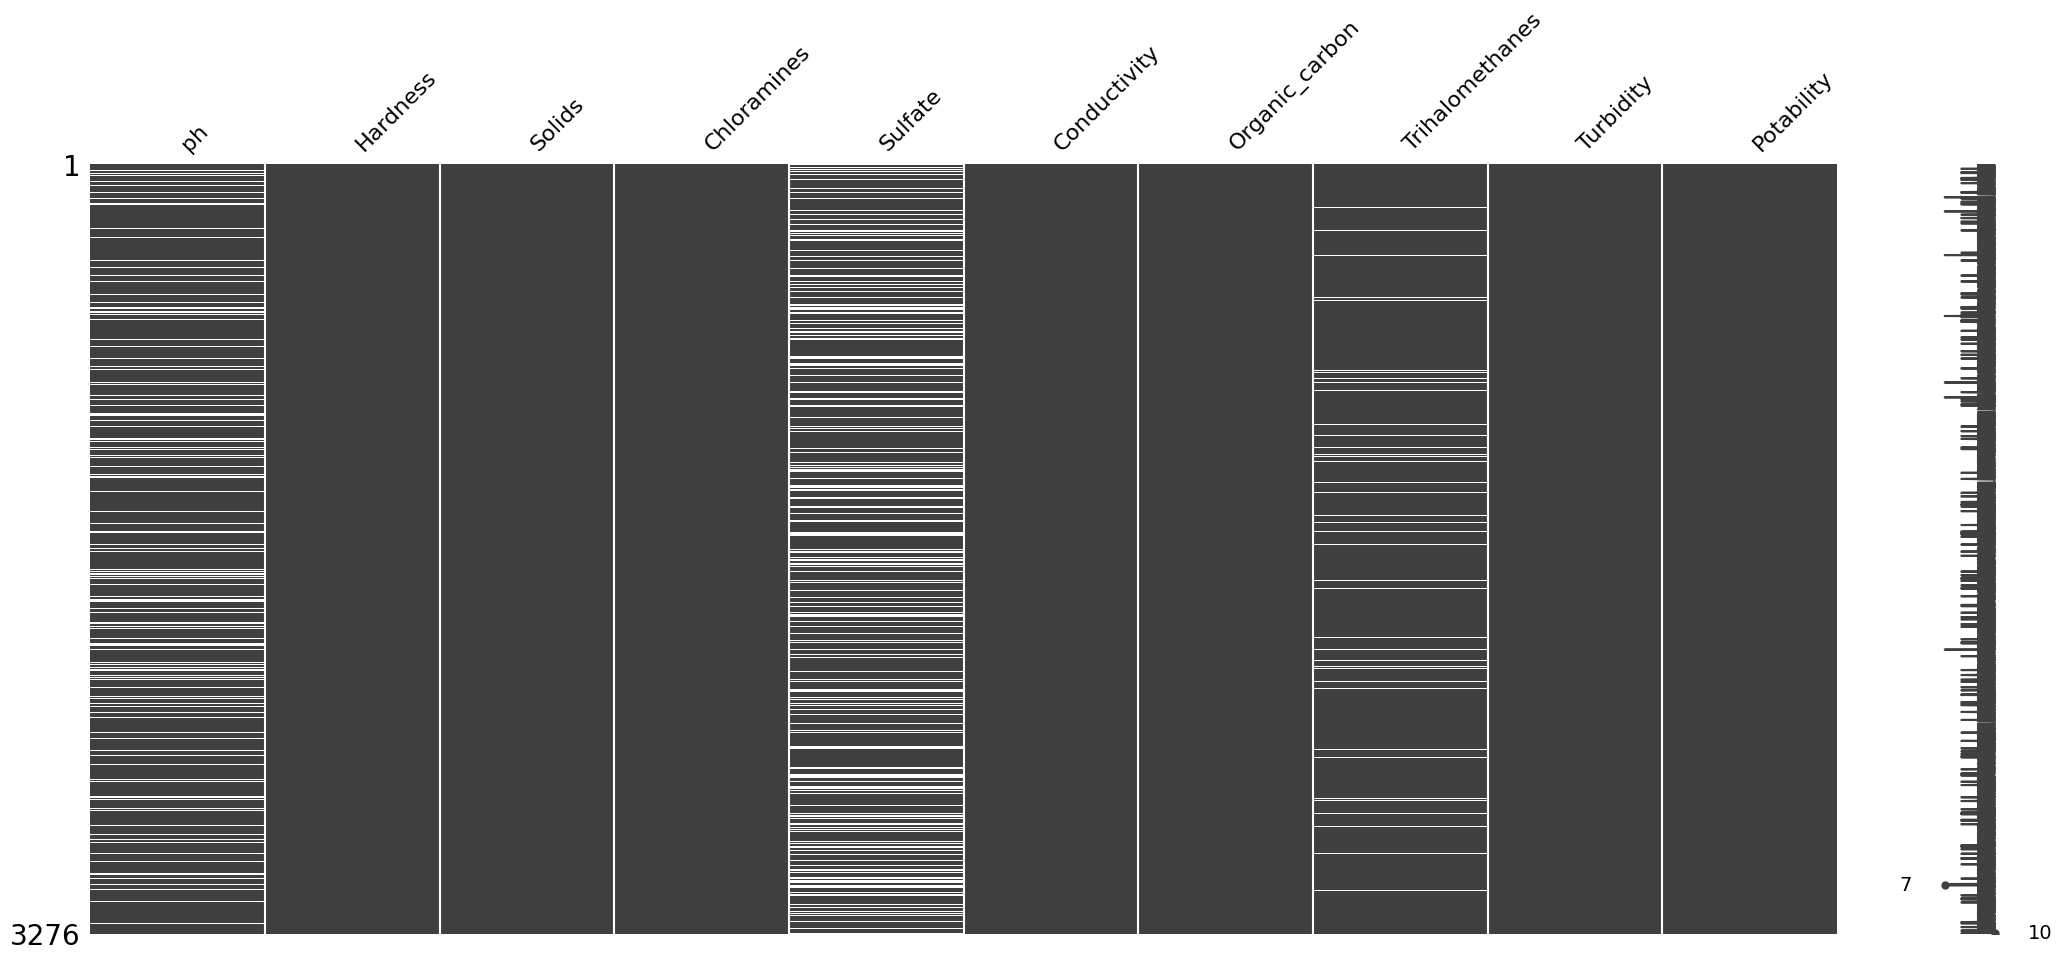

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()
#  columns having missing values Ph, Sulphate and Trihalomethanes

In [ ]:
list(zip(df.columns,df.dtypes,df.isnull().sum(),df.nunique()))

[('ph', dtype('float64'), 491, 2785),
 ('Hardness', dtype('float64'), 0, 3276),
 ('Solids', dtype('float64'), 0, 3276),
 ('Chloramines', dtype('float64'), 0, 3276),
 ('Sulfate', dtype('float64'), 781, 2495),
 ('Conductivity', dtype('float64'), 0, 3276),
 ('Organic_carbon', dtype('float64'), 0, 3276),
 ('Trihalomethanes', dtype('float64'), 162, 3114),
 ('Turbidity', dtype('float64'), 0, 3276),
 ('Potability', dtype('int64'), 0, 2)]

In [ ]:
#missing value imputation with mean

for col in df.columns:
  if(df[col].isnull().sum()>0):
    print(f'missing values are in {col}')
    df.loc[df[col].isnull(),col]= df[col].median()
    print(f'imputed with median {df[col].median()}')

missing values are in ph
imputed with median 7.036752103833548
missing values are in Sulfate
imputed with median 333.073545745888
missing values are in Trihalomethanes
imputed with median 66.62248509808484


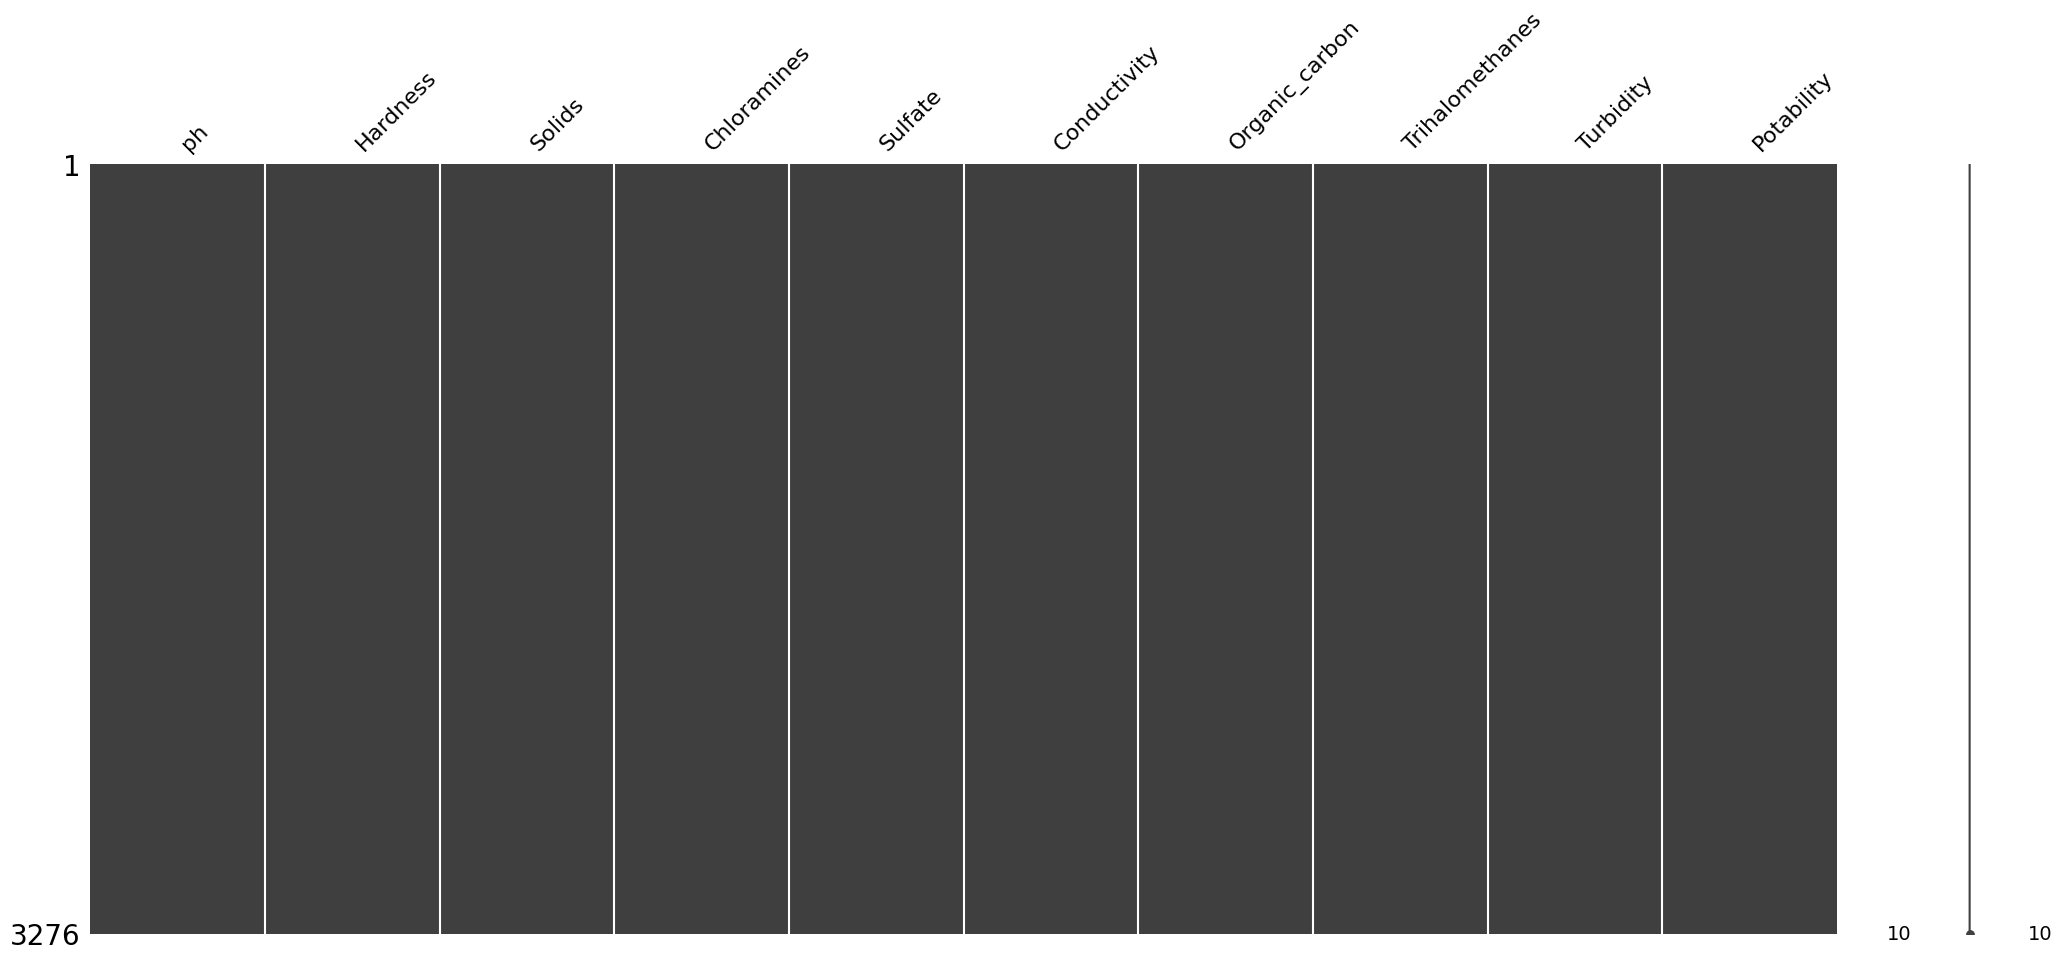

In [ ]:
#check if Missing values are present
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
#outlier detection and imputation
import numpy as np
def outlier_detectnImpute(df, col):

   print(f'Started outlier detection and imputation for {col}')
   q1 = np.percentile(df[col], 25)
   q3 = np.percentile(df[col], 75)
   iqr = q3 - q1
   lower = q1 - (iqr*1.5)
   upper = q3 + (iqr*1.5)


   df1 = df[df[col] > upper]
   df2 = df[df[col]  < lower]
   print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
   mean_before = df[col].mean()
   print(f'mean before outlier is {mean_before}')

   df[col] = df[col].apply(lambda x: lower if x<lower else x)
   df[col] = df[col].apply(lambda x: upper if x>upper else x)
   print ('outlier imputed successfully')
   mean_after = df[col].mean()
   print(f'mean after outlier is {mean_after}')
   return df

In [ ]:
for col in df.columns:
  df = outlier_detectnImpute(df, col)

Started outlier detection and imputation for ph
Total number of outliers are 142
mean before outlier is 7.074193521792814
outlier imputed successfully
mean after outlier is 7.0733477276232115
Started outlier detection and imputation for Hardness
Total number of outliers are 83
mean before outlier is 196.36949601730151
outlier imputed successfully
mean after outlier is 196.39242287662853
Started outlier detection and imputation for Solids
Total number of outliers are 47
mean before outlier is 22014.092526077104
outlier imputed successfully
mean after outlier is 21957.11220001634
Started outlier detection and imputation for Chloramines
Total number of outliers are 61
mean before outlier is 7.122276793425786
outlier imputed successfully
mean after outlier is 7.121793997984297
Started outlier detection and imputation for Sulfate
Total number of outliers are 264
mean before outlier is 333.6083644296454
outlier imputed successfully
mean after outlier is 333.621265413474
Started outlier detec

**Model Building**

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

I have given the split ratio as 80:20 as dataset was not huge and i tried with other split rations like 25:75, 30:70 but the result i got best in 20:80 split.

In [ ]:
#loading all the sklearn modules I need

#data preparation:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

import warnings
warnings.filterwarnings("ignore")


#splitting
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, stratify=y, random_state=0)
print(X_train.shape)
print(y_train.shape)

#standerdization features
scaler = StandardScaler() #calling the scaler
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(2620, 9)
(2620,)


In [ ]:
#fit the model
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2620, 9)
X_test (656, 9)
y_train (2620,)
y_test (656,)


Regularization and Hyperparameter tuning : Tried with below set of hyperparamere tuning to get the best param values.

C values : passing in decending order as i have seen its picking up the top 1st best value from the queue so as we know smaller values specify stronger regularization.



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import numpy as np
param= {'penalty': ['l1','l2'],
        'C':  [0.003,0.01,0.1,0.5,1], # Passing in ascending order as smaller values specify stronger regularization.
        'fit_intercept': [True],
        'solver':['liblinear', 'saga'],
        'class_weight':['balanced',None]

        }


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(fit_intercept=True)
logreg_cv=GridSearchCV(model,param,cv=10,verbose=3,error_score= 'raise')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 2/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 3/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 4/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 5/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 6/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 7/10] END C=0.003, class_weight=balanced, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.611 total time=   0.0s
[CV 8/10] END C=0.003, class_weight=balan

In [ ]:
log_bstParam = logreg_cv.best_params_
log_bstParam

{'C': 0.01,
 'class_weight': None,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [ ]:
log_bstModel = logreg_cv.best_estimator_
log_bstModel

LogisticRegression(C=0.01, solver='liblinear')

Best model parameter we get as : 'C': 0.01,
 'class_weight': None,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'


In [ ]:
#predict Probablity of the train dataset to get understanding how classes is been assigned to it.
Prob= log_bstModel.predict_proba(X_test)
Prob

array([[0.58537584, 0.41462416],
       [0.56877147, 0.43122853],
       [0.55830577, 0.44169423],
       ...,
       [0.5796222 , 0.4203778 ],
       [0.55472855, 0.44527145],
       [0.60141859, 0.39858141]])

In [ ]:
# find cuttoff for problity
cutoffs = np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [ ]:
train_score = log_bstModel.predict_proba(X_train)[:,1]
real= y_train

In [ ]:
#apply all the cutoff in train data and find the KS
ks_all =[]
for cutoff in cutoffs:
  predicted = (train_score>cutoff).astype(int)
  TP = ((predicted ==1) & (real==1)).sum()
  TN= ((predicted ==0) & (real==0)).sum()
  FP = ((predicted ==1) & (real==0)).sum()
  FN = ((predicted ==0) & (real==1)).sum()

  P = TP+FN
  N = TN+FP
  ks = (TP/P)-(FP/N)
  ks_all.append(ks)


In [ ]:
list(zip(cutoffs,ks_all))

[(0.01, 0.0),
 (0.02, 0.0),
 (0.03, 0.0),
 (0.04, 0.0),
 (0.05, 0.0),
 (0.060000000000000005, 0.0),
 (0.06999999999999999, 0.0),
 (0.08, 0.0),
 (0.09, 0.0),
 (0.09999999999999999, 0.0),
 (0.11, 0.0),
 (0.12, 0.0),
 (0.13, 0.0),
 (0.14, 0.0),
 (0.15000000000000002, 0.0),
 (0.16, 0.0),
 (0.17, 0.0),
 (0.18000000000000002, 0.0),
 (0.19, 0.0),
 (0.2, 0.0),
 (0.21000000000000002, 0.0),
 (0.22, 0.0),
 (0.23, 0.0),
 (0.24000000000000002, 0.0),
 (0.25, 0.0),
 (0.26, 0.0),
 (0.27, 0.0),
 (0.28, 0.0),
 (0.29000000000000004, 0.0),
 (0.3, 0.0),
 (0.31, 0.0),
 (0.32, 0.0),
 (0.33, -0.00035269135342852476),
 (0.34, -0.003094621701784761),
 (0.35000000000000003, -0.004471097678360181),
 (0.36000000000000004, -0.0048005211994445185),
 (0.37, 0.003972676217091409),
 (0.38, 0.016581392102162917),
 (0.39, 0.015207365371097348),
 (0.4, 0.026462873111937846),
 (0.41000000000000003, 0.07828033574257448),
 (0.42000000000000004, 0.05548275853623291),
 (0.43, 0.04472199838839644),
 (0.44, 0.035394046863863576)

In [ ]:
#find max ks to decide cutoff
my_cutoff = cutoffs[ks_all == max(ks_all)][0]
my_cutoff

0.41000000000000003

if the probablity is greater than or equal to .41 its assigning the values as 1 and others as 0 in training data.
 so the same will follow in the test data

In [ ]:
#predict Probablity
test_score= log_bstModel.predict_proba(X_test)[:,1]
test_score

array([0.41462416, 0.43122853, 0.44169423, 0.42316885, 0.41944312,
       0.41126244, 0.35811818, 0.38545515, 0.41009071, 0.40294779,
       0.38503742, 0.40352326, 0.41708262, 0.44775801, 0.42655592,
       0.40378901, 0.37929601, 0.37298375, 0.44151956, 0.34182603,
       0.41628141, 0.37626202, 0.40780902, 0.38481458, 0.43189397,
       0.44303749, 0.38388954, 0.43274041, 0.37093608, 0.4350658 ,
       0.4198368 , 0.37831543, 0.41256265, 0.41755575, 0.40468728,
       0.42142242, 0.43144447, 0.39824207, 0.43145405, 0.3915191 ,
       0.4327454 , 0.41969815, 0.41031982, 0.44305065, 0.43156141,
       0.43184193, 0.4003764 , 0.36288547, 0.41737431, 0.37253546,
       0.40762272, 0.43379435, 0.37526705, 0.4187144 , 0.37883624,
       0.41112576, 0.38613798, 0.42424105, 0.3818754 , 0.38360382,
       0.41580058, 0.38967631, 0.4102875 , 0.38087597, 0.41282766,
       0.35211464, 0.39553431, 0.38319137, 0.4030934 , 0.39556393,
       0.40931915, 0.36516014, 0.38512323, 0.43530988, 0.36787

In [ ]:
Class_Pred = (test_score>my_cutoff).astype(int)
Class_Pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
df_test = pd.DataFrame(list(zip(y_test,Class_Pred)),columns =["real","predicted"])
df_test

real  predicted
0       0          1
1       0          1
2       0          1
3       0          1
4       1          1
..    ...        ...
651     0          0
652     0          1
653     0          1
654     0          1
655     1          0

[656 rows x 2 columns]

**Performance Evaluation**

In [ ]:
k = pd.crosstab(df_test['real'],df_test['predicted'])
print('Confusion matrix :\n\n',k)

Confusion matrix :

 predicted    0    1
real               
0          239  161
1          150  106


In [ ]:
# Calculating Accuracy Score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
Accuracy = accuracy_score(y_test, Class_Pred)
print(Accuracy)

0.5259146341463414


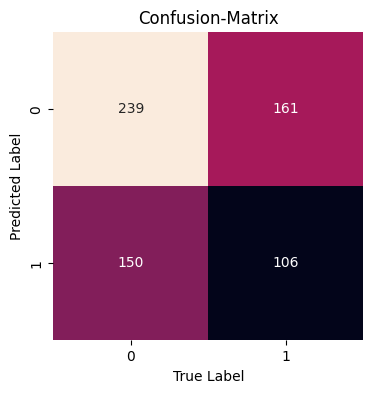

In [ ]:
from sklearn.metrics import confusion_matrix
fig,ax = plt.subplots(figsize=(4,4))
ax= sns.heatmap(confusion_matrix(y_test, Class_Pred),
                annot = True,
                cbar= False,
                fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion-Matrix')
plt.show()

Also in this case the Non Potable class is better predicted than Potable class.
Besides, we can notice again that recall, precision, f1score value for the 0 class is much higher than the 1 class.

we cannot consider here only accuracy as the data is not fully balanced and need to check all the performance matrices.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Class_Pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       400
           1       0.40      0.41      0.41       256

    accuracy                           0.53       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.53      0.53      0.53       656



In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score
#Calculate AUC
auc = roc_auc_score(y_test,test_score)
print(auc)


0.493359375


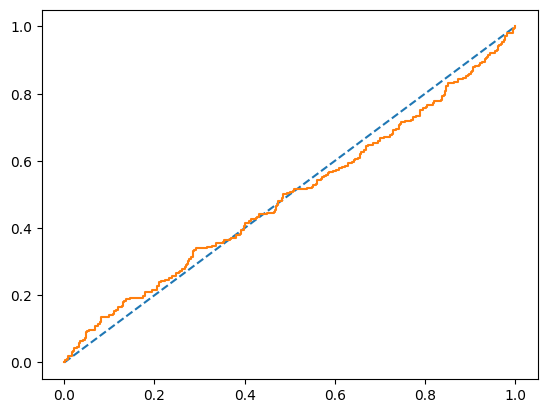

In [ ]:
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(y_test,test_score)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

Model is underfit as Logistic regression is not the best fit algorithem as explained non linearity behaviour of datapoints above.so if will use non linear classification models like Decision Tree, RandomForest or any other boosing algorithm will perform better.